In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.spatial.distance import cdist
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.decomposition import PCA

In [4]:
#1) Data Understanding & Exploration:
#A) Read ‘Car name.csv’ as a DataFrame and assign it to a variable
d1 = pd.read_csv("Car name.csv")

In [5]:
#B) Read ‘Car-Attributes.json as a DataFrame and assign it to a variable
d2 = pd.read_json("Car-Attributes.json")

In [6]:
d1

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino
...,...
393,ford mustang gl
394,vw pickup
395,dodge rampage
396,ford ranger


In [7]:
d2

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [8]:
#C) Merge both the DataFrames together to form a single DataFrame
d = pd.concat([d1,d2],axis=1)
d

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
394,vw pickup,44.0,4,97.0,52,2130,24.6,82,2
395,dodge rampage,32.0,4,135.0,84,2295,11.6,82,1
396,ford ranger,28.0,4,120.0,79,2625,18.6,82,1


In [9]:
d.shape

(398, 9)

In [10]:
#D) Print 5 point summary of the numerical features and share insights.
d.describe()
print('"hp" is an object ')

"hp" is an object 


In [11]:
#2)A) Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach. 
d.isnull().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [12]:
d.isnull().value_counts()

car_name  mpg    cyl    disp   hp     wt     acc    yr     origin
False     False  False  False  False  False  False  False  False     398
dtype: int64

In [13]:
percent_miss = d.isnull().sum()*100/len(d)
percent_miss

car_name    0.0
mpg         0.0
cyl         0.0
disp        0.0
hp          0.0
wt          0.0
acc         0.0
yr          0.0
origin      0.0
dtype: float64

In [14]:
#B) Check for duplicate values in the data and impute with the best suitable approach. 
dupe = d.duplicated()
sum(dupe)

0

In [15]:
dupe.isnull().any()

False

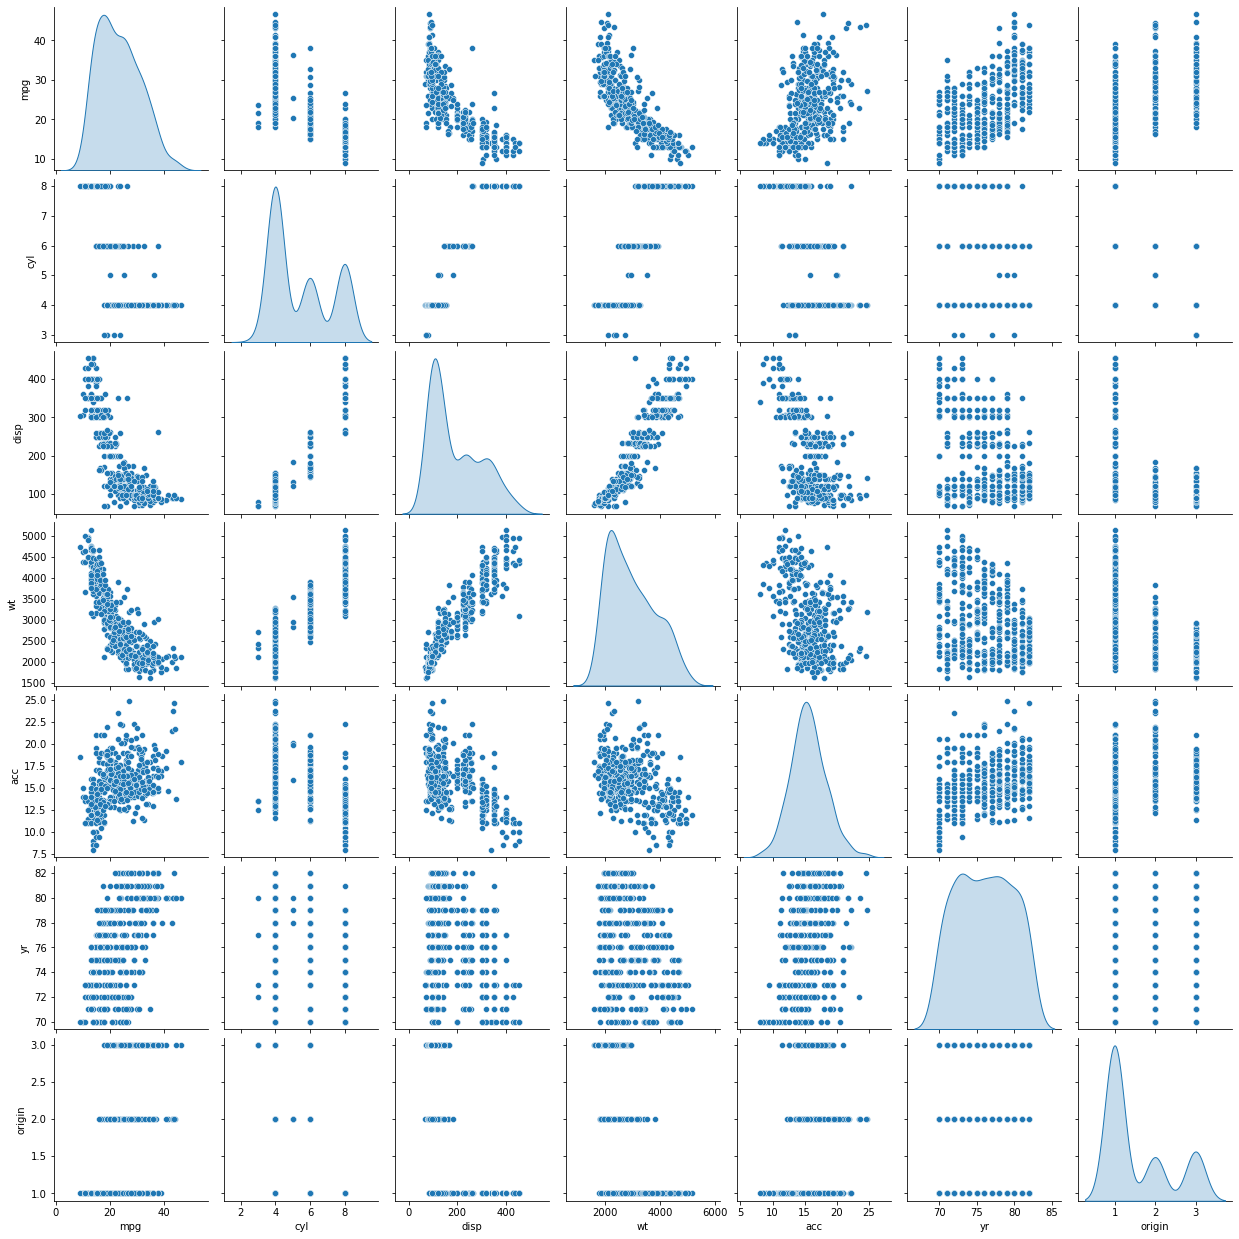

In [16]:
#C. Plot a pairplot for all features
sns.pairplot(d, diag_kind='kde')

<AxesSubplot:xlabel='wt', ylabel='disp'>

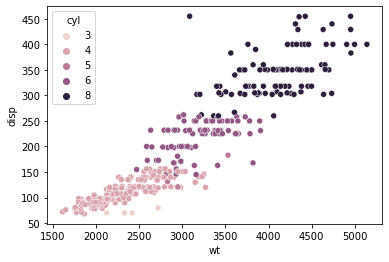

In [17]:
#D. Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl
sns.scatterplot(x='wt', y='disp', hue='cyl', data=d)

#E. Share insights for Q2.d
we clearly see the difference shown in above pairplot the cylinder counts is increased depends upons the weight and displacement of each car features.

<AxesSubplot:xlabel='wt', ylabel='mpg'>

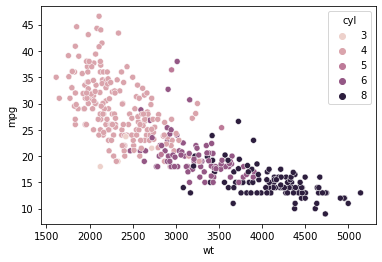

In [18]:
#F. Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’.
sns.scatterplot(x='wt',y='mpg', hue='cyl', data=d)

#G. Share insights for Q2.f.
cylinders counts are measured shown as mpg decreases with weight increases

In [19]:
#H. Check for unexpected values in all the features and datapoints with such values. [
d.isin(['?']).any()

car_name    False
mpg         False
cyl         False
disp        False
hp           True
wt          False
acc         False
yr          False
origin      False
dtype: bool

In [20]:
d.isin(['?']).any().any()

True

In [21]:
data= d.replace(to_replace='?', value=np.nan)
data

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,1
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,2
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,1
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,1


In [22]:
data.hp.isnull().sum()

6

In [23]:
data.isin(['?']).any().any()

False

In [24]:
dat_impute = data.fillna(data.hp.median())
dat_impute

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,1
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,2
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,1
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,1


In [25]:
dat_impute.hp.mean()

104.30402010050251

In [26]:
dat_impute.describe()

,mpg,cyl,disp,hp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [27]:
da_att = dat_impute.iloc[:,1:]
da_Scaled= da_att.apply(zscore)

In [28]:
da_att.dtypes

mpg       float64
cyl         int64
disp      float64
hp        float64
wt          int64
acc       float64
yr          int64
origin      int64
dtype: object

In [29]:
clusters=range(2,11)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(da_Scaled)
    prediction=model.predict(da_Scaled)
    meanDistortions.append(sum(np.min(cdist(da_Scaled, model.cluster_centers_, 'euclidean'), axis=1)) / da_Scaled.shape[0])


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

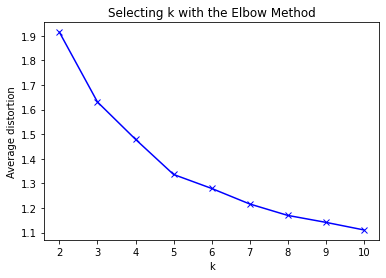

In [30]:
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

Though the bend is not coming out clearly as there are many bends, we observe 5 clusters and 7 clusters.

The possible elbow points are 3 clusters, 5 clusters and 7 clusters.

In [31]:
final_model=KMeans(3)
final_model.fit(da_Scaled)
prediction=final_model.predict(da_Scaled)

#Append the prediction 
dat_impute["GROUP"] = prediction
da_Scaled["GROUP"] = prediction
print("Groups Assigned : \n")
dat_impute.head()

Groups Assigned : 



,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,GROUP
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,1
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,1
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,1
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,1
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,1


In [32]:
dat_impute.GROUP.value_counts()

2    161
0    137
1    100
Name: GROUP, dtype: int64

In [33]:
dat_Clust = dat_impute.groupby(['GROUP'])
dat_Clust.mean()

,mpg,cyl,disp,hp,wt,acc,yr,origin
GROUP,,,,,,,,
0,21.69562,5.240876,187.558394,94.897810,2990.861314,16.772263,76.313869,1.087591
1,14.71500,7.980000,346.370000,160.550000,4126.910000,12.721000,73.750000,1.000000
2,30.52795,4.068323,103.422360,77.372671,2234.720497,16.311801,77.155280,2.341615


array([[<AxesSubplot:title={'center':'acc'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'hp'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'mpg'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'origin'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'wt'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'yr'}, xlabel='[GROUP]'>]],
      dtype=object)

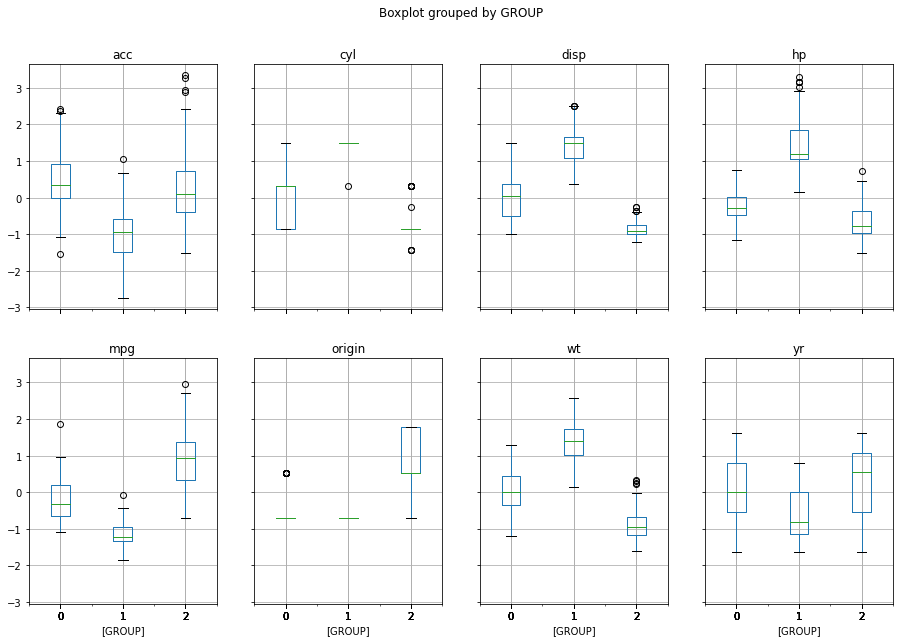

In [34]:
da_Scaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [35]:
final_model=KMeans(5)
final_model.fit(da_Scaled)
prediction=final_model.predict(da_Scaled)

#Append the prediction 
dat_impute["GROUP"] = prediction
da_Scaled["GROUP"] = prediction
print("Groups Assigned : \n")
dat_impute.head()

Groups Assigned : 



,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,GROUP
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,1
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,1
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,1
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,1
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,1


In [36]:
dat_impute.GROUP.value_counts()

1    97
4    83
0    78
2    78
3    62
Name: GROUP, dtype: int64

In [37]:
dat_Clust = dat_impute.groupby(['GROUP'])
dat_Clust.mean()

,mpg,cyl,disp,hp,wt,acc,yr,origin
GROUP,,,,,,,,
0,26.098718,4.102564,104.397436,84.307692,2276.500000,15.787179,74.128205,2.500000
1,14.528866,7.979381,348.020619,161.804124,4143.969072,12.641237,73.628866,1.000000
2,19.161538,6.179487,231.474359,100.288462,3282.948718,16.707692,75.589744,1.038462
3,24.837097,4.193548,137.411290,89.330645,2651.677419,16.782258,77.290323,1.145161
4,34.690361,4.036145,102.506024,70.855422,2195.457831,16.804819,80.000000,2.192771


array([[<AxesSubplot:title={'center':'acc'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'hp'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'mpg'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'origin'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'wt'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'yr'}, xlabel='[GROUP]'>]],
      dtype=object)

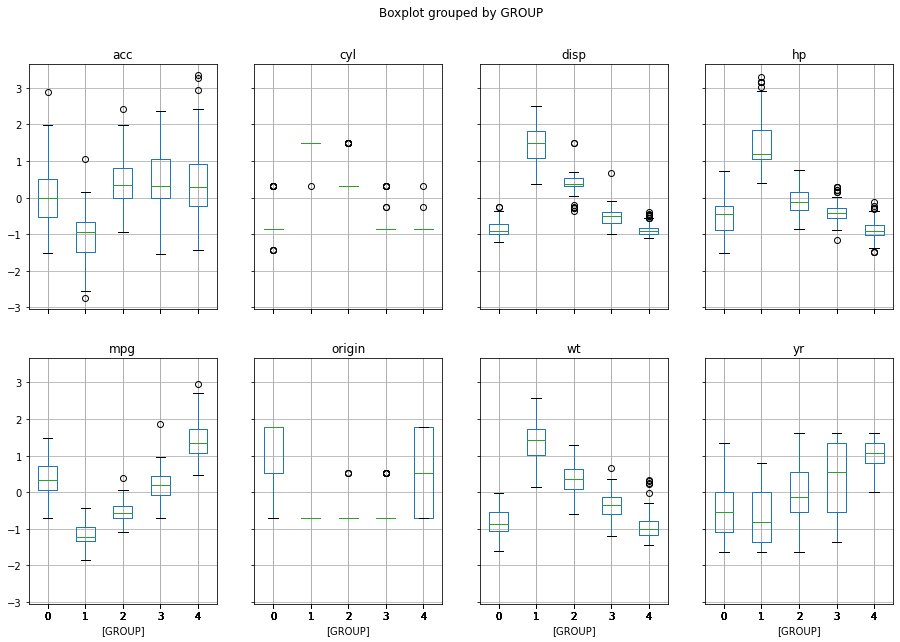

In [38]:
da_Scaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

# PART B

In [39]:
#read the data
df= pd.read_csv("vehicle.csv")

In [40]:
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [41]:
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [42]:
# percent of missing values
percent = df.isnull().sum()*100/len(df)
percent

compactness                    0.000000
circularity                    0.591017
distance_circularity           0.472813
radius_ratio                   0.709220
pr.axis_aspect_ratio           0.236407
max.length_aspect_ratio        0.000000
scatter_ratio                  0.118203
elongatedness                  0.118203
pr.axis_rectangularity         0.354610
max.length_rectangularity      0.000000
scaled_variance                0.354610
scaled_variance.1              0.236407
scaled_radius_of_gyration      0.236407
scaled_radius_of_gyration.1    0.472813
skewness_about                 0.709220
skewness_about.1               0.118203
skewness_about.2               0.118203
hollows_ratio                  0.000000
class                          0.000000
dtype: float64

In [43]:
#impute the missing values with median
df_impute = df.fillna(df.median())

C:\Users\HP\AppData\Local\Temp/ipykernel_248652/2549106042.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_impute = df.fillna(df.median())


In [44]:
df_impute.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [45]:
df_impute.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.tree import export_graphviz  
from IPython.display import Image  
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from math import sqrt
from sklearn.model_selection import cross_validate
import time
from sklearn import preprocessing

In [47]:
def changeTypes(df_impute):
    df_impute['class'] = df_impute['class'].astype('category')
    cat_columns = df_impute.select_dtypes(include='category').columns
    df_impute[cat_columns] = df_impute[cat_columns].apply(lambda x: x.cat.codes)
    return(df_impute)

<AxesSubplot:ylabel='class'>

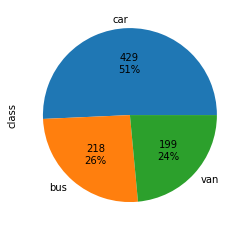

In [48]:
# pie chart
def label_function(val):
    return f'{val / 100 * len(df_impute):.0f}\n{val:.0f}%'

df_impute['class'].value_counts().plot(kind='pie',autopct=label_function)

In [49]:
dup = df_impute.duplicated()
sum(dup)

0

In [50]:
label_encoder = preprocessing.LabelEncoder()

df_impute['class'] = label_encoder.fit_transform(df_impute['class'])

df_impute['class'].unique()

array([2, 1, 0])

In [51]:
df_impute['class'].value_counts()

1    429
0    218
2    199
Name: class, dtype: int64

In [52]:
df_impute

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,2
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,2
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,1
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,2
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195,1
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197,2
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201,1
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195,1


In [53]:
X=df_impute.iloc[:,:-1]
y=df_impute['class']
X.shape, y.shape

((846, 18), (846,))

In [54]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state =42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
# training a base classification model using SVM 
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)

y_pred = svc_model.predict(X_test)

# check the accuracy on the training set and testing set on base model
print('Base model (linear kernel):')
print('---------------------------')
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))
print('')

# Confusion matrix
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print('')
print('')

Base model (linear kernel):
---------------------------
0.9442567567567568
0.9251968503937008

Confusion Matrix:
 [[ 73   3   2]
 [ 10 106   2]
 [  1   1  56]]




In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90        78
           1       0.96      0.90      0.93       118
           2       0.93      0.97      0.95        58

    accuracy                           0.93       254
   macro avg       0.92      0.93      0.93       254
weighted avg       0.93      0.93      0.93       254



In [57]:
# applying PCA on the data with 10 components
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
scaler = StandardScaler()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Text(0, 0.5, 'Second Principal Component')

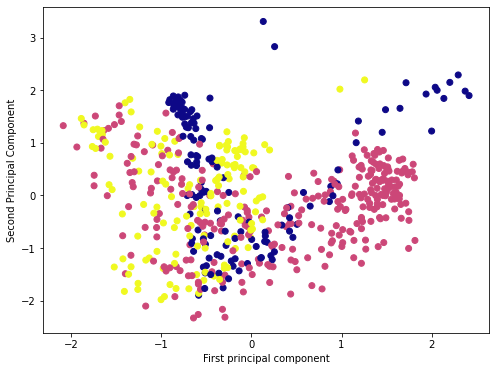

In [58]:
# visualizing the cumulative variance explained with number of components
plt.figure(figsize=(8,6))
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

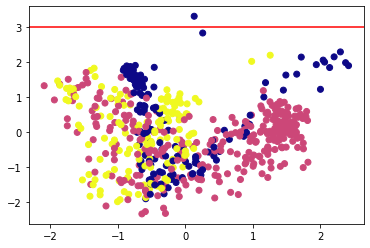

In [59]:
#HORIZONTAL LINE FOR ABOVE SCATTERPLOT WITH THRESHOLD 90%
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='plasma')
plt.axhline(y = 3 ,color='red', )
  
  
# rendering the plot
plt.show()

In [60]:
# REDUCING THE COMPONENTS AND APPLYING THE PCA AS 7 COMPONENTS
pca = PCA(n_components=7)
scaler = StandardScaler()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Text(0, 0.5, 'Second Principal Component')

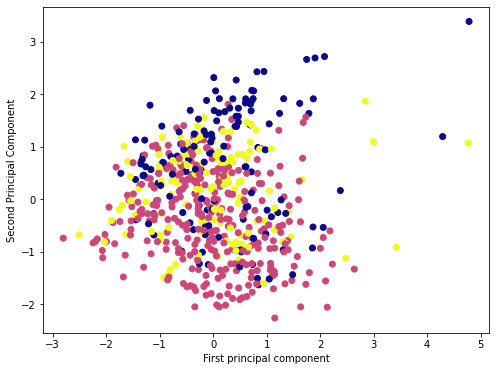

In [61]:
plt.figure(figsize=(8,6))
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

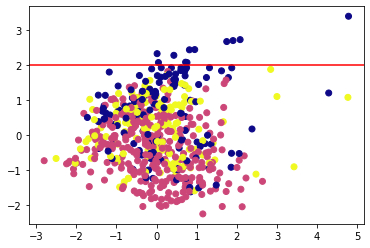

In [62]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='plasma')
plt.axhline(y = 2 ,color='red', )
  
  
# rendering the plot
plt.show()

# 5)Data Understanding and Cleaning
## Assumptions of PCA

1) Independent variables are highly correlated to each other.

2) Variables included are metric level or nominal level.

3) Features are low dimensional in nature.


## Advantages of PCA

1) Removes Correlated Features.

2) Improves Algorithm Performance.

3) Reduces Overfitting.

4) Improves Visualization.

## Limitations

1) Independent variables become less interpretable.

2) Data standardization is must before PCA.